# Predicting number of meanings for every word using simple linear regression model and pretrained embeddings



### word2vec-google-news-300


In [ ]:
import gensim.downloader as api

w2v_google_news_300 = api.load('word2vec-google-news-300')
w2v_google_news_300.save("word2vec-google-news-300.bin")

In [ ]:
from gensim.models import KeyedVectors

w2v_model = KeyedVectors.load("word2vec-google-news-300.bin")

In [ ]:
print(len(w2v_model.vocab)) #number of embeddings in our dataset

3000000


Counting number of meanings for every word in embeddings dataset skipping words that are not in the WordNet.

In [ ]:
def prepare_data(model):
  word_to_def_num = dict()

  for lemma in wn.all_lemma_names():
    if lemma in model.vocab:
      word_to_def_num[lemma] = len(wn.synsets(lemma))
  
  return word_to_def_num

In [ ]:
import nltk
from nltk.corpus import wordnet as wn
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
word_to_definitions_count = prepare_data(w2v_model)

In [ ]:
print(len(word_to_definitions_count))

54586


Creating samples for linear regression model

In [ ]:
import random

def sample(word_to_definitions_count, model):
  words = list(word_to_definitions_count.keys())
  random.shuffle(words)

  X = np.array([model[w] for w in words])
  y = np.array([word_to_definitions_count[w] for w in words])   

  return X, y

In [ ]:
import numpy as np

X, y = sample(word_to_definitions_count, w2v_model)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lin_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = lin_reg.predict(X_test)
y_true = y_test

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

MSE = mean_squared_error(y_true, y_pred)
print("MSE:", MSE)

MAE = mean_absolute_error(y_true, y_pred)
print("MAE:", MAE)

r2 = r2_score(y_true, y_pred)
print("R2 score:", r2)

Evaluating accuracy by rounding predicted values and checking if they are equal to true values


In [ ]:
def accuracy_1(y_true, y_predicted):
  count = 0
  for i in range(len(y_true)):
    if y_true[i] == round(y_predicted[i]):
      count += 1
  return count / len(y_true)

In [ ]:
accuracy_1(y_true, y_pred)

Evaluating accuracy by checking if predicted values are close enough to true values

In [ ]:
def accuracy_2(y_true, y_predicted, eps):
  count = 0
  for i in range(len(y_true)):
    if abs(y_true[i] - y_predicted[i]) <= eps:
      count += 1
  return count / len(y_true)

In [ ]:
accuracy_2(y_true, y_pred, 1)

In [ ]:
accuracy_2(y_true, y_pred, 2)

In [ ]:
import matplotlib.pyplot as plt

def plot_distribution(word_to_def_num, min_value, max_value):
  values = word_to_def_num.values()
  plt.hist(values, bins=range(min_value, max_value + 1))
  plt.xlabel("number of definitions for word in WordNet")
  plt.ylabel("number of words")
  plt.grid()

###do experiment multiple times and get mean scores

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate_embeddings(model, n):
  word_to_defs = prepare_data(model)
  X, y = sample(word_to_defs, model)

  MSE = np.zeros(n)
  MAE = np.zeros(n)
  acc_1 = np.zeros(n)
  acc_2 = np.zeros(n) 
  
  for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    lin_reg = LinearRegression().fit(X_train, y_train)
    
    y_pred = lin_reg.predict(X_test)
    y_true = y_test

    MSE[i] = mean_squared_error(y_true, y_pred)
    MAE[i] = mean_absolute_error(y_true, y_pred)
    acc_1[i] = accuracy_1(y_true, y_pred)
    acc_2[i] = accuracy_2(y_true, y_pred, 1)
  
  return MSE.mean(), MAE.mean(), acc_1.mean(), acc_2.mean(), len(word_to_defs)

In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_embeddings(w2v_model, 100)

In [ ]:
print(MSE, MAE, accuracy, accuracy_weak, ds_size)

6.171259707410332 1.4112131395942018 0.2614416559809489 0.4985281187030592 54586


### Histograms for our dataset used in the linear regression experiment

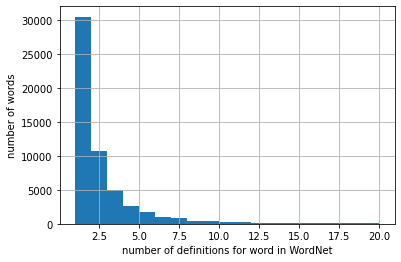

In [ ]:
plot_distribution(word_to_definitions_count, 1, 20)

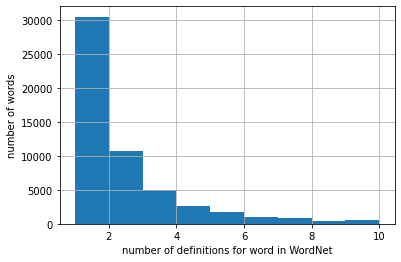

In [ ]:
plot_distribution(word_to_definitions_count, 1, 10)

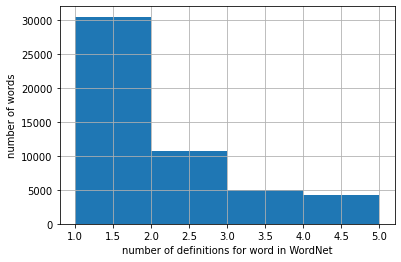

In [ ]:
plot_distribution(word_to_definitions_count, 1, 5)

In [ ]:
wn_def_num = {}

for lemma in wn.all_lemma_names():
  wn_def_num[lemma] = len(wn.synsets(lemma))

Histograms for all words in the WordNet

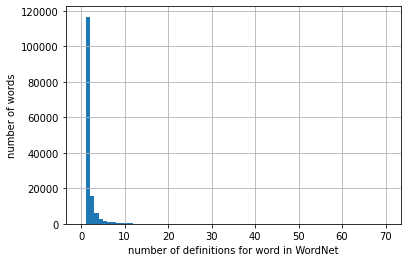

In [ ]:
plot_distribution(wn_def_num, 0, 70)

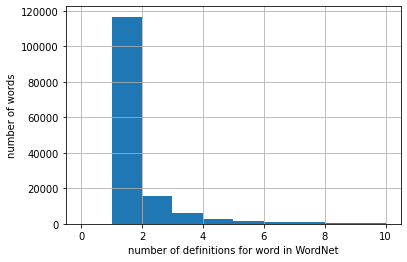

In [ ]:
plot_distribution(wn_def_num, 0, 10)

Histograms for values predicted by linear regression classifier

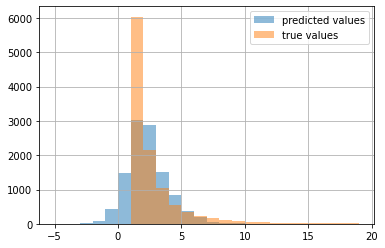

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(y_pred, bins=range(-5, 20), alpha=0.5, label="predicted values")
plt.hist(y_true, bins=range(-5, 20), alpha=0.5, label="true values")
plt.legend()
plt.grid()
plt.show()


## normalized word2vec-google-news


In [ ]:
w2v_model.init_sims(replace=True)

In [ ]:
norm_word_to_def_count = prepare_data(w2v_model)

In [ ]:
import numpy as np

X, y = sample(norm_word_to_def_count, w2v_model)

In [ ]:
print(X.mean())
print(X.min())
print(X.max())
print(y.mean())
print(y.min())
print(y.max())

-0.0012134771
-0.3197764
0.28714082
2.3084490528706993
1
75


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=389234)

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = lin_reg.predict(X_test)
y_true = y_test

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MSE: ", mean_squared_error(y_true, y_pred))
print("MAE: ", mean_absolute_error(y_true, y_pred))
print("R2 score: ", r2_score(y_true, y_pred))

MSE:  5.219964528330426
MAE:  1.3776527779795438
R2 score:  0.30801227328290504


## fasttext-wiki-news-subwords-300 


In [ ]:
import gensim.downloader as api
from gensim.models import KeyedVectors
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
ft_model = api.load("fasttext-wiki-news-subwords-300")

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
ft_model.save("fasttext-wiki-news-subwords-300.bin")

In [ ]:
ft_model = KeyedVectors.load("fasttext-wiki-news-subwords-300.bin")

In [ ]:
word_to_defs = prepare_data(ft_model)
print("Dataset size:", len(word_to_defs.keys()))

NameError: ignored

In [ ]:
def apply_linear_regression(model, word_to_def_count):
  X, y = sample(word_to_def_count, model)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  lin_reg = LinearRegression().fit(X_train, y_train)
  y_pred = lin_reg.predict(X_test)
  y_true = y_test
  
  return y_true, y_pred

In [ ]:
def print_results(MSE, MAE, R2_score):
  for i in range(len(MSE)):
    print(i)
    print("MSE:", MSE[i])
    print("MAE:", MAE[i])
    print("R2_score", R2_score[i])
    print("\n")

In [ ]:
def plot_results(metric):
  n = len(metric)
  x = np.array([i for i in range(1, n + 1)])
  plt.plot(x, metric)
  plt.grid()

In [ ]:
def repeat_lin_reg(model, word_to_def_count, iter):
  MSE = np.empty(iter)
  MAE = np.empty(iter)
  R2_score = np.empty(iter)

  for i in range(iter):
    y_true, y_pred = apply_linear_regression(model, word_to_def_count)
    MSE[i] = mean_squared_error(y_true, y_pred)
    MAE[i] = mean_absolute_error(y_true, y_pred)
    R2_score = r2_score(y_true, y_pred)
  return MSE, MAE, R2_score

In [ ]:
MSE, MAE, R2_score = repeat_lin_reg(ft_model, word_to_defs, 100)

In [ ]:
print(MSE.min())
print(MSE.max())
print(MSE.mean())

In [ ]:
plot_results(MSE)

In [ ]:
plot_results(MAE)

In [ ]:
plt.hist(word_to_defs.values(), bins=range(0, 20))
plt.xlabel("number of definitions in the WordNet")
plt.ylabel("number of words")

Evaluating accuracy by rounding predicted values

In [ ]:
y_true, y_pred = apply_linear_regression(ft_model, word_to_defs)
print(accuracy_1(y_true, y_pred))

Evaluating accuracy by checking if differences between predicted and true value are less or equal to 1

In [ ]:
y_true, y_pred = apply_linear_regression(ft_model, word_to_defs)
print(accuracy_2(y_true, y_pred, 1))

In [ ]:
plt.hist(y_true, alpha=0.5, label="true values", bins=range(-1, 20))
plt.hist(y_pred, alpha=0.5, label="predicted values", bins=range(-1, 20))

In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_embeddings(ft_model, 100)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

0.31485928221017306 0.5679783113865221 5.085742672875187 1.2588486268221741 58091


## glove-wiki-gigaword-50


In [ ]:
import gensim.downloader as api
from gensim.models import KeyedVectors
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as pl

In [ ]:
model = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [ ]:
word_to_defs = prepare_data(model)
print("Dataset size:", len(word_to_defs))

Dataset size: 55666


In [ ]:
y_true, y_pred = apply_linear_regression(model, word_to_defs)
print(accuracy_1(y_true, y_pred))

0.327195976288845


In [ ]:
MSE, MAE, _ = repeat_lin_reg(model, word_to_defs, 100)

In [ ]:
import matplotlib.pyplot as plt

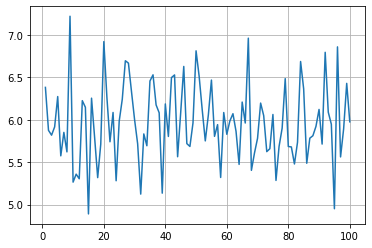

In [ ]:
plot_results(MSE)

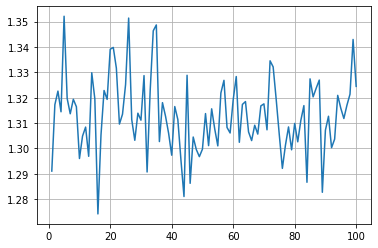

In [ ]:
plot_results(MAE)

(array([    0., 30826., 11212.,  5178.,  2700.,  1696.,  1036.,   816.,
          462.,   356.,   279.,   202.,   149.,   130.,    86.,    85.,
           72.,    60.,    80.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

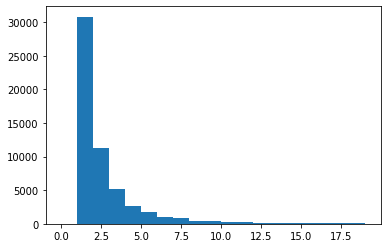

In [ ]:
plt.hist(word_to_defs.values(), bins=range(0, 20))

In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_embeddings(model, 100)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

0.3262349559906592 0.5676666067900126 5.903195617275612 1.3140603841417502 55666


##glove-wiki-gigaword-100

In [ ]:
model = api.load("glove-wiki-gigaword-100")

[==============================================----] 93.9% 120.2/128.1MB downloaded


In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_embeddings(model, 100)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

0.34642716005029633 0.5935099694629065 5.462452574610049 1.2587495545450564 55666


##glove-wiki-gigaword-200

In [ ]:
model = api.load("glove-wiki-gigaword-200")

[==================================================] 100.0% 252.1/252.1MB downloaded


In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_embeddings(model, 100)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

0.3469894018322256 0.5964505119453924 5.5799524280007065 1.2622467530936468 55666


##glove-wiki-gigaword-300

In [ ]:
model = api.load("glove-wiki-gigaword-300")

[=================================================-] 99.3% 373.4/376.1MB downloaded


In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_embeddings(model, 100)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

0.3422938746182863 0.5945114065026047 5.678120398388909 1.2667505599297377 55666


##glove-twitter-25

In [ ]:
model = api.load("glove-twitter-25")

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_embeddings(model, 100)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

0.25088848594741614 0.46694469628286484 8.160224088441392 1.631643239019402 38601


##glove-twitter-50

In [ ]:
model = api.load("glove-twitter-50")

[==================================================] 100.0% 199.5/199.5MB downloaded


In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_embeddings(model, 100)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

0.25955187151923326 0.4731524413936019 7.969836283652261 1.606372492928422 38601


##glove-twitter-100


In [ ]:
model = api.load("glove-twitter-100")

In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_embeddings(model, 100)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

0.2612174588783836 0.4777839658075379 7.63119724939635 1.5822997689474092 38601


##glove-twitter-200


In [ ]:
model = api.load("glove-twitter-200")

In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_embeddings(model, 100)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

0.263757285325735 0.4832728921124207 7.4049081456626675 1.5578108730197355 38601


# XGBoost experiments

In [ ]:
import gensim.downloader as api
from gensim.models import KeyedVectors
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as pl

In [ ]:
def prepare_data(model):
  word_to_def_num = dict()

  for lemma in wn.all_lemma_names():
    if lemma in model.vocab:
      word_to_def_num[lemma] = len(wn.synsets(lemma))
  
  return word_to_def_num

In [ ]:
import random

def sample(word_to_definitions_count, model):
  words = list(word_to_definitions_count.keys())
  random.shuffle(words)

  X = np.array([model[w] for w in words])
  y = np.array([word_to_definitions_count[w] for w in words])   

  return X, y

In [ ]:
model = api.load("word2vec-google-news-300")

In [ ]:
word_to_defs = prepare_data(model)

In [ ]:
X, y = sample(word_to_defs, model)

In [ ]:
from xgboost import XGBRegressor

XGB_model = XGBRegressor(n_estimators=1000, max_depth=10, eta=0.01, subsample=1, colsample_bytree=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
XGB_model.fit(X_train, y_train)

[19:43:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eta=0.01, max_depth=10, n_estimators=1000)

In [ ]:
y_pred = XGB_model.predict(X_test)
MSE(y_test, y_pred)

6.162211231891875

In [ ]:
def accuracy_1(y_true, y_predicted):
  count = 0
  for i in range(len(y_true)):
    if y_true[i] == round(y_predicted[i]):
      count += 1
  return count / len(y_true)

def accuracy_2(y_true, y_predicted, eps):
  count = 0
  for i in range(len(y_true)):
    if abs(y_true[i] - y_predicted[i]) <= eps:
      count += 1
  return count / len(y_true)

In [ ]:
accuracy_1(y_test, y_pred)

0.3634365268364169

In [ ]:
accuracy_2(y_test, y_pred, 1)

0.6118336691701777

##find hyperparameters for XGBRegressor

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from xgboost import XGBRegressor
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

def objective(search_space):
    model = XGBRegressor(**search_space)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = MSE(y_test, y_pred)
    return {'loss': mse, 'status': STATUS_OK}

model = api.load("word2vec-google-news-300")
word_to_defs = prepare_data(model)
X, y = sample(word_to_defs, model)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

search_space={
            'n_estimators': hp.choice('n_estimators', range(10, 50)),
            'eta': hp.choice('eta', [0.03, 0.25, 0.5, 1]),
            'max_depth':  hp.choice('max_depth', np.arange(1, 10, dtype=int)),
}

best_params = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=100
    )

print(best_params)

[18:03:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:03:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:04:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:05:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:06:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:07:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:07:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import numpy as np

def evaluate_xgboost(model, n):
  word_to_defs = prepare_data(model)
  X, y = sample(word_to_defs, model)

  MSE = np.zeros(n)
  MAE = np.zeros(n)
  acc_1 = np.zeros(n)
  acc_2 = np.zeros(n) 
  
  for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    xgboost = XGBRegressor(n_estimators=100, max_depth=10, eta=0.01)
    xgboost.fit(X_train, y_train)
    y_pred = xgboost.predict(X_test)
    y_true = y_test

    MSE[i] = mean_squared_error(y_true, y_pred)
    MAE[i] = mean_absolute_error(y_true, y_pred)
    acc_1[i] = accuracy_1(y_true, y_pred)
    acc_2[i] = accuracy_2(y_true, y_pred, 1)
  
  return MSE.mean(), MAE.mean(), acc_1.mean(), acc_2.mean(), len(word_to_defs)

## word2vec-google-news-300

In [ ]:
model = api.load("word2vec-google-news-300")

In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_xgboost(model, 5)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

[00:39:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:46:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:53:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.36371130243634364 0.6187030591683458 5.4196057642768505 1.2529543278232165 54586


## fasttext-wiki-news-subwords-300

In [ ]:
model = api.load("fasttext-wiki-news-subwords-300")

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_xgboost(model, 5)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

[01:10:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:15:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:19:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:24:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:29:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.460848610035287 0.7088217574662192 4.192171291106441 1.0370253287721947 58091


## glove-wiki-gigaword-50

In [ ]:
model = api.load("glove-wiki-gigaword-50")

[=================================================-] 98.5% 65.0/66.0MB downloaded


In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_xgboost(model, 5)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

[01:39:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:40:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:41:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:42:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:42:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.43597988144422495 0.7021196335548769 4.550781599449813 1.0963789970790845 55666


## glove-wiki-gigaword-100

In [ ]:
model = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_xgboost(model, 5)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

[01:46:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:48:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:49:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:51:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:52:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.4463624932638764 0.7005748158792886 4.329783062953647 1.0762653479600524 55666


## glove-wiki-gigaword-200

In [ ]:
model = api.load("glove-wiki-gigaword-200")

[=================================================-] 98.8% 249.1/252.1MB downloaded

In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_xgboost(model, 5)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

[01:58:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:01:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:04:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:07:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:09:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.4287946829531165 0.6911981318483923 4.7021594129833275 1.1178482948106303 55666


## glove-wiki-gigaword-300

In [ ]:
model = api.load("glove-wiki-gigaword-300")

[=================================================-] 99.5% 374.2/376.1MB downloaded


In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_xgboost(model, 5)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

[02:22:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:26:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:35:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:39:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.4211783725525418 0.6897431291539429 4.846338872559338 1.129206423213843 55666


## glove-twitter-25

In [ ]:
model = api.load("glove-twitter-25")

[==================================================] 100.0% 104.8/104.8MB downloaded


In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_xgboost(model, 5)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

[02:48:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:48:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:48:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:49:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.3179380909208652 0.5861675948711307 6.356926828323084 1.402394858141233 38601


## glove-twitter-50

In [ ]:
model = api.load("glove-twitter-50")

[=================================================-] 99.7% 198.9/199.5MB downloaded


In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_xgboost(model, 5)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

[03:28:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:29:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:29:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:30:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:31:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.3104261106074343 0.5803393342831239 6.841532581014414 1.4174310030753154 38601


## glove-twitter-100

In [ ]:
model = api.load("glove-twitter-100")

[=================================================-] 99.9% 386.6/387.1MB downloaded


In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_xgboost(model, 5)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

[03:19:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:20:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:21:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:22:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:24:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.30837974355653414 0.5710659241030955 6.617557834753702 1.4124417476604028 38601


## glove-twitter-200

In [ ]:
model = api.load("glove-twitter-200")

In [ ]:
MSE, MAE, accuracy, accuracy_weak, ds_size = evaluate_xgboost(model, 5)

print(accuracy, accuracy_weak, MSE, MAE, ds_size)

[03:45:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:47:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:49:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:51:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:53:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.304131589172387 0.5727755472089109 6.861530595583174 1.4257143763043907 38601
